In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\olona\Downloads\DATA SCIENCE\jose portilla\Naive Bayes and NLP\31640132-moviereviews.csv")
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


***

# Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
#check for null values
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
#drop null values
df.dropna(inplace=True)

In [6]:
#check for blank strings in the review column
len(df[df['review'].astype(str).str.strip()==''])

27

In [7]:
df[df['review'].astype(str).str.strip()=='']

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [8]:
#drop blank strings
df = df[~df['review'].str.isspace()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


***

# Exploratory Data Analysis on bag of words

In [10]:
#Use countvectorizer to choose top 20 words from both labels

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print (sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [11]:
matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print (sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


#### It makes sense that words like 'film' and 'movie' have the highest frequency considering that we are dealing with just those things

****

# ML model

In [12]:
y = df['label']
X = df['review']

In [13]:
# train, test, split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [16]:
#vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_tfidf

<1550x35075 sparse matrix of type '<class 'numpy.float64'>'
	with 374673 stored elements in Compressed Sparse Row format>

### Comparing Naive Bayes model and linear SVC

In [17]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [18]:
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

### Performance evaluation

In [19]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [20]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



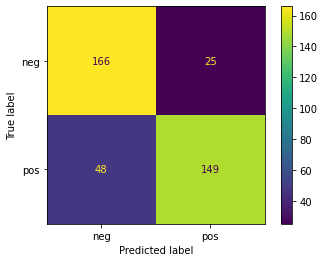

In [21]:
print("NB MODEL")
report(nb)

SVC MODEL
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



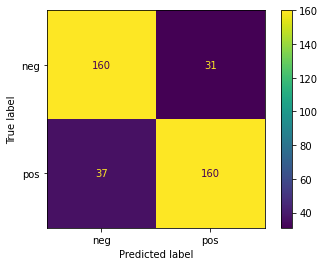

In [22]:
print("SVC MODEL")
report(svc)

##### they have similar and good performances. However Naive Bayes model performs slightly better

### Creating pipeline for deployment on new reviews

In [31]:
#So we create a pipeline for the Naive base classifier as well as our tf idf vector
pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])


In [34]:
pipe.fit(df['review'],df['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [35]:
new_review=['the movie is not actually so bad. Has a good plot']
pipe.predict(new_review)

#I tried to confuse the algorithm lmao. This should lean more towards a good review. However, our model is not entirely accurate and it probably weighted the word 'bad' higher

array(['neg'], dtype='<U3')

In [36]:
new_review_two=['I watched the movie with my family. We had a swell time']
pipe.predict(new_review_two)


array(['neg'], dtype='<U3')

In [37]:
new_review_three=['Extraordinary']
pipe.predict(new_review_three)

array(['pos'], dtype='<U3')